## 신용카드

출처 : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.  
This study reviewed the literature and used the following 23 variables as explanatory variables:  
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
X2: Gender (1 = male; 2 = female).  
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
X4: Marital status (1 = married; 2 = single; 3 = others).  
X5: Age (year).  
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.  
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [170]:
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import all_estimators
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
df=pd.read_excel('./file/default of credit card clients.xls', skiprows=1)

In [98]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
df=df.drop(columns=['ID'])

In [100]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [102]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [103]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [104]:
target=df.iloc[:, -1]

In [105]:
target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [106]:
df=df.drop(columns=['default payment next month'])
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [109]:
# 스케일링
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [110]:
df_scaled=scaler.transform(df)
df_scaled.shape

(30000, 23)

## 주성분 분석

In [111]:
# 주성분 개수 지정
pca=PCA(n_components=0.95)

In [112]:
pca.fit(df_scaled)

PCA(n_components=0.95)

In [113]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[6.54330745 4.09846452 1.55101233 1.4723145  1.02527213 0.95723146
 0.9076182  0.88764591 0.87127841 0.78295576 0.73281262 0.68284393
 0.57096763 0.52440738 0.40365398]
[0.28448215 0.17818817 0.06743307 0.06401154 0.04457556 0.04161737
 0.03946035 0.03859201 0.03788041 0.03404042 0.03186036 0.02968788
 0.02482385 0.02279956 0.01754959]


In [114]:
dfPCA=pca.transform(df_scaled)

In [115]:
dfPCA.shape

(30000, 15)

In [116]:
dfPCA_DF=pd.DataFrame(dfPCA)
dfPCA_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.523445,0.692641,-1.657578,0.499490,-0.480548,1.386082,-0.302460,-0.633772,0.268464,-0.414811,0.208686,-0.107828,-0.486764,-0.859910,0.284989
29996,-1.775043,-0.051203,-0.415313,0.527131,-0.679529,1.635199,-0.238730,0.229556,-0.118407,0.521588,0.086641,-1.398692,0.780507,-0.099226,-0.360408
29997,0.357457,-3.312755,0.610741,0.470701,-1.233101,0.737447,-0.633700,0.678667,-0.485240,0.980342,0.174057,3.281982,0.980430,-0.031540,-0.552752
29998,0.650552,0.722901,0.522682,2.883824,-0.242863,1.615207,-1.807357,-0.704548,1.788825,-1.104633,-4.264073,0.646611,-0.797392,0.094272,-1.112271


In [117]:
PCA_DF=pd.concat([dfPCA_DF, target], axis=1)
PCA_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,default payment next month
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425,1
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007,1
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379,0
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116,0
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.523445,0.692641,-1.657578,0.499490,-0.480548,1.386082,-0.302460,-0.633772,0.268464,-0.414811,0.208686,-0.107828,-0.486764,-0.859910,0.284989,0
29996,-1.775043,-0.051203,-0.415313,0.527131,-0.679529,1.635199,-0.238730,0.229556,-0.118407,0.521588,0.086641,-1.398692,0.780507,-0.099226,-0.360408,0
29997,0.357457,-3.312755,0.610741,0.470701,-1.233101,0.737447,-0.633700,0.678667,-0.485240,0.980342,0.174057,3.281982,0.980430,-0.031540,-0.552752,1
29998,0.650552,0.722901,0.522682,2.883824,-0.242863,1.615207,-1.807357,-0.704548,1.788825,-1.104633,-4.264073,0.646611,-0.797392,0.094272,-1.112271,1


In [131]:
re=pca.inverse_transform(dfPCA_DF)
re

array([[-1.15969485,  0.81461202,  0.17234916, ..., -0.24987662,
        -0.28803474, -0.31217955],
       [-0.46194864,  0.81320478,  0.16160059, ..., -0.11459094,
        -0.33575066, -0.16686276],
       [-0.59637625,  0.80944407,  0.18676346, ..., -0.23290722,
        -0.24148579, -0.01156055],
       ...,
       [-1.10768721, -1.2206634 ,  0.15264018, ...,  0.04067689,
        -0.16395081, -0.1688338 ],
       [-0.64846722, -1.23091489,  1.45207746, ..., -0.29684215,
         3.14233655, -0.20099603],
       [-0.90198887, -1.23869763,  0.19436835, ..., -0.28073943,
        -0.29506364, -0.20689138]])

In [134]:
pd.DataFrame(re, columns=df.columns)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.159695,0.814612,0.172349,-1.068709,-1.247942,2.028757,1.040914,0.009820,-0.953498,-1.401461,...,-0.611591,-0.756871,-0.813169,-0.819899,-0.437699,-0.170761,-0.247891,-0.249877,-0.288035,-0.312180
1,-0.461949,0.813205,0.161601,0.842622,-1.028566,-0.310767,0.379408,0.752101,0.888630,0.869530,...,-0.645437,-0.593688,-0.552388,-0.564893,-0.474572,-0.233539,-0.169845,-0.114591,-0.335751,-0.166863
2,-0.596376,0.809444,0.186763,0.858721,-0.161377,0.028293,0.085636,0.147432,0.211874,0.232982,...,-0.423813,-0.419862,-0.417807,-0.423777,-0.269290,-0.207154,-0.233094,-0.232907,-0.241486,-0.011561
3,-0.903392,0.806193,0.193547,-1.054535,0.164480,0.014029,0.123224,0.160728,0.194463,0.208616,...,-0.082622,-0.093752,-0.094848,-0.100087,-0.206409,-0.162577,-0.274411,-0.256862,-0.249481,-0.222296
4,-0.915988,-1.237745,0.188391,-1.061219,2.331740,-0.715042,-0.372032,-0.222200,0.098784,0.178754,...,-0.203625,-0.319952,-0.289278,-0.336532,-0.270192,1.366330,0.268756,0.262065,-0.263301,-0.242979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.432419,-1.276069,1.531710,-1.028590,0.382351,-0.019994,0.282598,0.320792,0.245730,0.053998,...,1.331758,1.079455,0.913370,0.840107,0.331820,0.698305,-0.362855,-0.440037,-0.168156,-0.031765
29996,-0.150128,-1.235247,1.448701,0.855720,0.812864,-0.784838,-0.918865,-0.724927,-0.269723,0.061538,...,-0.672061,-0.541110,-0.569508,-0.575198,-0.240884,-0.112068,0.243530,-0.305168,-0.329361,-0.284585
29997,-1.107687,-1.220663,0.152640,0.846363,0.162018,3.690338,2.449784,1.303957,0.355939,0.081404,...,-0.656193,-0.454817,-0.518612,-0.531273,-0.364869,-0.283215,1.089135,0.040677,-0.163951,-0.168834
29998,-0.648467,-1.230915,1.452077,-1.056040,0.597450,0.700708,-0.275678,-0.020632,-0.095018,-0.050149,...,0.052440,-0.184238,-0.389991,0.243451,4.910205,0.020468,-0.246614,-0.296842,3.142337,-0.200996


In [119]:
pca.components_

array([[ 6.85184323e-02, -2.16564559e-02,  1.92056117e-02,
        -5.60026083e-03,  1.42315227e-02,  1.61081970e-01,
         1.94119641e-01,  2.00213038e-01,  2.07038234e-01,
         2.10960472e-01,  2.06412352e-01,  3.34385122e-01,
         3.45796995e-01,  3.49777117e-01,  3.53883216e-01,
         3.51752413e-01,  3.44514390e-01,  9.42312296e-02,
         7.86808761e-02,  8.63941854e-02,  7.77927170e-02,
         7.53544304e-02,  6.99481572e-02],
       [ 3.16322879e-01,  3.05947306e-02, -9.15225417e-02,
        -4.32509370e-02,  6.65780269e-02, -2.98123879e-01,
        -3.34820614e-01, -3.43894067e-01, -3.44581437e-01,
        -3.31600381e-01, -3.05793874e-01,  1.39815174e-01,
         1.40226985e-01,  1.46213389e-01,  1.45449832e-01,
         1.43760869e-01,  1.41872155e-01,  1.49109472e-01,
         1.39871902e-01,  1.51570097e-01,  1.41409070e-01,
         1.37190501e-01,  1.29396376e-01],
       [ 1.74535217e-02,  2.40375133e-02, -3.16425804e-01,
         4.53184753e-01, -4.6

<AxesSubplot:>

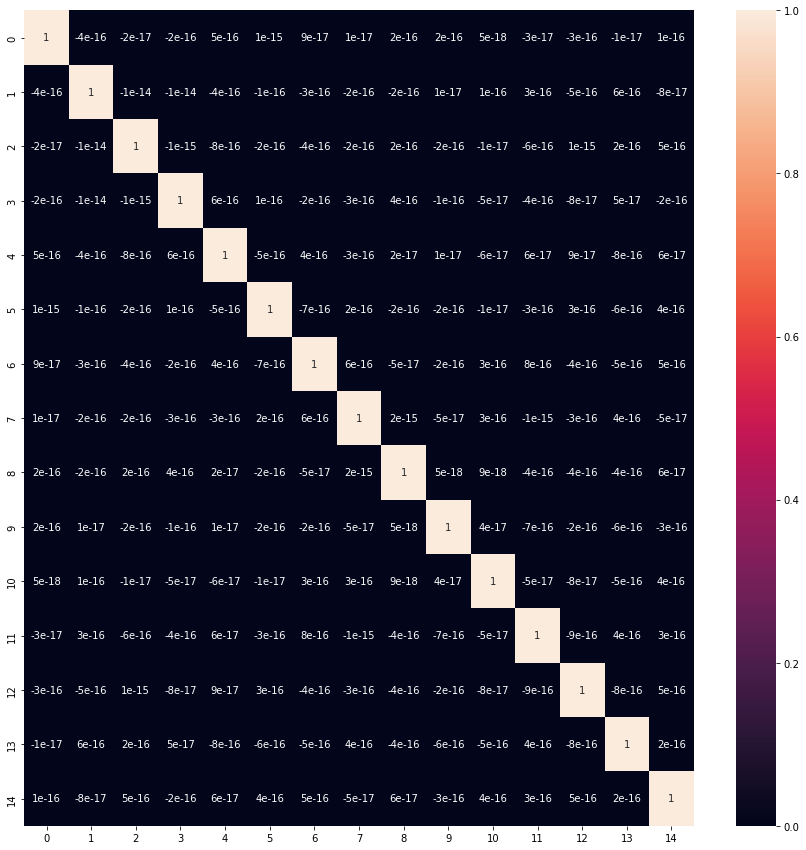

In [130]:
plt.figure(figsize=(15, 15))
sns.heatmap(dfPCA_DF.corr(), annot=True, fmt='.1g')

<AxesSubplot:>

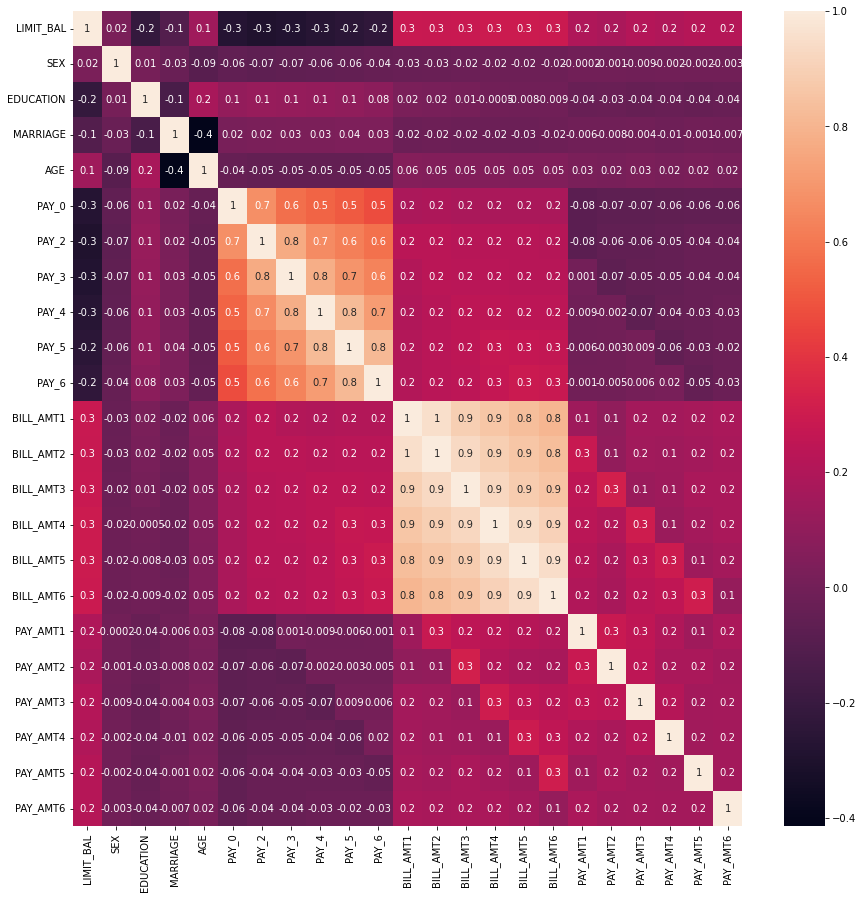

In [128]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.1g')

In [141]:
data_pre=df_scaled
data_aft=dfPCA_DF

In [145]:
# PCA 하기 전 데이터
x_train_pre, x_test_pre, y_train_pre, y_test_pre=train_test_split(
data_pre, target, stratify=target, test_size=0.2, random_state=42)

In [146]:
# PCA 하고 난 후 데이터
x_train_aft, x_test_aft, y_train_aft, y_test_aft=train_test_split(
data_aft, target, stratify=target, test_size=0.2, random_state=42)

In [147]:
print(x_train_pre.shape, x_test_pre.shape, y_train_pre.shape, y_test_pre.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


### 1) PCA 하기 전 데이터프레임

In [148]:
model=LogisticRegression()
model.fit(x_train_pre, y_train_pre)

LogisticRegression()

In [149]:
model.score(x_test_pre, y_test_pre)

0.8078333333333333

### 2) PCA 하고 난 후 데이터프레임

In [150]:
model2=LogisticRegression()
model2.fit(x_train_aft, y_train_aft)

LogisticRegression()

In [151]:
model2.score(x_test_aft, y_test_aft)

0.8071666666666667

### all_estimators

In [153]:
models=all_estimators(type_filter='classifier')

In [154]:
scores=[]

for name, model in models:
    try:
        # 모델 객체 생성
        md=model()
        # 학습
        md.fit(x_train_pre, y_train_pre)
        # 평가
        train_result=md.score(x_train_pre, y_train_pre)
        result=md.score(x_test_pre, y_test_pre)
        scores.append((name, train_result, result))
        
    except:
        pass

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in t

In [163]:
pd.DataFrame(scores, columns=['model', 'train', 'test']).sort_values(by='test', ascending=False)

,model,train,test
11,HistGradientBoostingClassifier,0.835708,0.818333
10,GradientBoostingClassifier,0.826792,0.818167
28,SVC,0.825583,0.816000
0,AdaBoostClassifier,0.820167,0.814833
24,RandomForestClassifier,0.999417,0.814167
7,ExtraTreesClassifier,0.999458,0.811167
19,MLPClassifier,0.834250,0.811167
9,GaussianProcessClassifier,0.882042,0.810333
15,LinearDiscriminantAnalysis,0.812875,0.808667
17,LogisticRegression,0.811458,0.807833


In [165]:
histModel=HistGradientBoostingClassifier()
histModel.fit(x_train_pre, y_train_pre)
histModel.score(x_test_pre, y_test_pre)

0.8176666666666667

In [166]:
histModel2=HistGradientBoostingClassifier()
histModel.fit(x_train_aft, y_train_aft)
histModel.score(x_test_aft, y_test_aft)

0.8125

In [171]:
histModel.n_features_in_

15

## Deep Learning

In [199]:
def build_model(n_hidden, n_neurons, learning_rate, input_shape=(15, )):
    model=Sequential()
    model.add(InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [200]:
keras_clf=KerasClassifier(build_model,
                         n_hidden=1,
                         n_neurons=3,
                         learning_rate=0.001,
                         loss='binary_crossentropy',
                         epochs=3)

In [201]:
keras_clf.fit(x_train_aft, y_train_aft)

Epoch 1/3
750/750 [==============================] - 1s 994us/step - loss: 0.5575
Epoch 2/3
750/750 [==============================] - 1s 915us/step - loss: 0.4847
Epoch 3/3
750/750 [==============================] - 1s 904us/step - loss: 0.4659


KerasClassifier(
	model=<function build_model at 0x000001B690E181F0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=binary_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=3
	n_hidden=1
	n_neurons=3
	learning_rate=0.001
	class_weight=None
)

In [202]:
params={
    'n_hidden':[3, 5, 10],
    'optimizer':['adam', 'sgd'],
    'learning_rate':[0.001, 0.01, 0.1],
}

In [203]:
gs=GridSearchCV(keras_clf, params,
               refit=False, cv=3,
               scoring='accuracy',
               verbose=False)

In [204]:
gs.fit(x_train_aft, y_train_aft)

Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5826
Epoch 2/3
500/500 [==============================] - 0s 978us/step - loss: 0.4995
Epoch 3/3
250/250 [==============================] - 0s 818us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.5377
Epoch 2/3
500/500 [==============================] - 0s 979us/step - loss: 0.4723
Epoch 3/3
250/250 [==============================] - 0s 692us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.6441
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5724
Epoch 3/3
250/250 [==============================] - 0s 696us/step
Epoch 1/3
500/500 [==============================] - 1s 882us/step - loss: 0.5993
Epoch 2/3
500/500 [==============================] - 0s 891us/step - loss: 0.5350
Epoch 3/3
250/250 [==============================] - 0s 755us/step
Epoch 1/3
500/500 [==============================] - 1s 891us/step - loss: 0.5443
Ep

500/500 [==============================] - 1s 1ms/step - loss: 0.5369
Epoch 3/3
250/250 [==============================] - 0s 774us/step
Epoch 1/3
500/500 [==============================] - 1s 934us/step - loss: 0.5776
Epoch 2/3
500/500 [==============================] - 0s 933us/step - loss: 0.5301
Epoch 3/3
250/250 [==============================] - 0s 861us/step
Epoch 1/3
500/500 [==============================] - 1s 981us/step - loss: 0.5476
Epoch 2/3
500/500 [==============================] - 0s 957us/step - loss: 0.5279
Epoch 3/3
250/250 [==============================] - 0s 780us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.6383
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5708
Epoch 3/3
250/250 [==============================] - 0s 883us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.6397
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5719
Epoch 3/3
250/

GridSearchCV(cv=3,
             estimator=KerasClassifier(epochs=3, learning_rate=0.001, loss='binary_crossentropy', model=<function build_model at 0x000001B690E181F0>, n_hidden=1, n_neurons=3),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_hidden': [3, 5, 10], 'optimizer': ['adam', 'sgd']},
             refit=False, scoring='accuracy', verbose=False)

In [205]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8028749999999999
{'learning_rate': 0.1, 'n_hidden': 3, 'optimizer': 'adam'}


---

In [206]:
def build_model_node(neuron_1, neuron_2, neuron_3, learning_rate, input_shape=(15, )):
    model=Sequential()
    model.add(InputLayer(input_shape=input_shape))
    
    model.add(Dense(neuron_1, activation='relu'))
    model.add(Dense(neuron_2, activation='relu'))
    model.add(Dense(neuron_3, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [208]:
keras_clf=KerasClassifier(build_model_node,
                         neuron_1=3,
                         neuron_2=3,
                          neuron_3=3,
                         learning_rate=0.001,
                         loss='binary_crossentropy',
                         epochs=3)

In [209]:
keras_clf.fit(x_train_aft, y_train_aft)

Epoch 1/3
750/750 [==============================] - 1s 1ms/step - loss: 0.5658
Epoch 2/3
750/750 [==============================] - 1s 1ms/step - loss: 0.5080
Epoch 3/3
750/750 [==============================] - 1s 1ms/step - loss: 0.4974


KerasClassifier(
	model=<function build_model_node at 0x000001B68C917CA0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=binary_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=3
	neuron_1=3
	neuron_2=3
	neuron_3=3
	learning_rate=0.001
	class_weight=None
)

In [210]:
params={
    'neuron_1':[32, 64, 128],
    'neuron_2':[32, 64, 128],
    'neuron_3':[32, 64, 128],
    'optimizer':['adam', 'sgd'],
    'learning_rate':[0.001, 0.01, 0.1],
}

In [211]:
gs2=GridSearchCV(keras_clf, params,
               refit=True, cv=3,
               scoring='accuracy',
               verbose=False)

In [212]:
gs2.fit(x_train_aft, y_train_aft)

Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4810
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4477
Epoch 3/3
250/250 [==============================] - 0s 769us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4807
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4450
Epoch 3/3
250/250 [==============================] - 0s 837us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4787
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4453
Epoch 3/3
250/250 [==============================] - 0s 939us/step
Epoch 1/3
500/500 [==============================] - 1s 983us/step - loss: 0.5378
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4866
Epoch 3/3
250/250 [==============================] - 0s 830us/step
Epoch 1/3
500/500 [==============================] - 1s 934us/step - loss: 0.5283
Epoch 2/

250/250 [==============================] - 0s 868us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5199
Epoch 2/3
500/500 [==============================] - 0s 997us/step - loss: 0.4753
Epoch 3/3
250/250 [==============================] - 0s 848us/step
Epoch 1/3
500/500 [==============================] - 1s 965us/step - loss: 0.5156
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4751
Epoch 3/3
250/250 [==============================] - 0s 781us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4741
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4453
Epoch 3/3
250/250 [==============================] - 0s 834us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4707
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4399
Epoch 3/3
250/250 [==============================] - 0s 782us/step
Epoch 1/3
500/500 [============

500/500 [==============================] - 1s 1ms/step - loss: 0.4755
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4416
Epoch 3/3
250/250 [==============================] - 0s 767us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4715
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4428
Epoch 3/3
250/250 [==============================] - 0s 773us/step
Epoch 1/3
500/500 [==============================] - 1s 998us/step - loss: 0.5207
Epoch 2/3
500/500 [==============================] - 0s 991us/step - loss: 0.4735
Epoch 3/3
250/250 [==============================] - 0s 769us/step
Epoch 1/3
500/500 [==============================] - 1s 964us/step - loss: 0.5291
Epoch 2/3
500/500 [==============================] - 0s 976us/step - loss: 0.4782
Epoch 3/3
250/250 [==============================] - 0s 773us/step
Epoch 1/3
500/500 [==============================] - 1s 973us/step - loss: 0.5224
Epoch 2/3
50

Epoch 3/3
250/250 [==============================] - 0s 870us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5239
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4733
Epoch 3/3
250/250 [==============================] - 0s 924us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4674
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4443
Epoch 3/3
250/250 [==============================] - 0s 869us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4674
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4385
Epoch 3/3
250/250 [==============================] - 0s 883us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.4665
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4433
Epoch 3/3
250/250 [==============================] - 0s 783us/step
Epoch 1/3
500/500 [======

500/500 [==============================] - 1s 1ms/step - loss: 0.4673
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4426
Epoch 3/3
250/250 [==============================] - 0s 841us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5295
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4696
Epoch 3/3
250/250 [==============================] - 0s 908us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5196
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4646
Epoch 3/3
250/250 [==============================] - 0s 830us/step
Epoch 1/3
500/500 [==============================] - 2s 3ms/step - loss: 0.5239
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4645
Epoch 3/3
250/250 [==============================] - 0s 881us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4689
Epoch 2/3
500/500 [===

250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4665
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4434
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4640
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4385
Epoch 3/3
250/250 [==============================] - 0s 869us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4684
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4413
Epoch 3/3
250/250 [==============================] - 0s 887us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.5208
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4694
Epoch 3/3
250/250 [==============================] - 0s 925us/step
Epoch 1/3
500/500 [====================

500/500 [==============================] - 1s 1ms/step - loss: 0.5331
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4825
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 997us/step - loss: 0.5426
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5008
Epoch 3/3
250/250 [==============================] - 0s 869us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5549
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5065
Epoch 3/3
250/250 [==============================] - 0s 823us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4784
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4440
Epoch 3/3
250/250 [==============================] - 0s 798us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4759
Epoch 2/3
500/500 [===

250/250 [==============================] - 0s 930us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4702
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4405
Epoch 3/3
250/250 [==============================] - 0s 978us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4691
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4434
Epoch 3/3
250/250 [==============================] - 2s 887us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5210
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4736
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5155
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4735
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [====================

500/500 [==============================] - 1s 1ms/step - loss: 0.5336
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4767
Epoch 3/3
250/250 [==============================] - 0s 775us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5405
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4788
Epoch 3/3
250/250 [==============================] - 0s 719us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.4830
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4444
Epoch 3/3
250/250 [==============================] - 0s 847us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4790
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4422
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4720
Epoch 2/3
500/500 [=====

250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4656
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4413
Epoch 3/3
250/250 [==============================] - 0s 826us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.5208
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4711
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5340
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4837
Epoch 3/3
250/250 [==============================] - 0s 896us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5200
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4769
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [======================

500/500 [==============================] - 1s 1ms/step - loss: 0.5099
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4703
Epoch 3/3
250/250 [==============================] - 0s 907us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.4662
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4425
Epoch 3/3
250/250 [==============================] - 0s 858us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4669
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4390
Epoch 3/3
250/250 [==============================] - 0s 830us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4703
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4406
Epoch 3/3
250/250 [==============================] - 0s 975us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5466
Epoch 2/3
500/500 [===

250/250 [==============================] - 0s 946us/step
Epoch 1/3
500/500 [==============================] - 2s 1ms/step - loss: 0.5229
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4723
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5227
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4715
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5248
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4702
Epoch 3/3
250/250 [==============================] - 0s 931us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4657
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4422
Epoch 3/3
250/250 [==============================] - 0s 977us/step
Epoch 1/3
500/500 [====================

500/500 [==============================] - 2s 1ms/step - loss: 0.4824
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4474
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4751
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4447
Epoch 3/3
250/250 [==============================] - 0s 782us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4780
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4461
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5200
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4750
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5153
Epoch 2/3
500/500 [=========

250/250 [==============================] - 1s 890us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5169
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4696
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5276
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4778
Epoch 3/3
250/250 [==============================] - 0s 953us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4815
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4489
Epoch 3/3
250/250 [==============================] - 0s 972us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4699
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4393
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [====================

500/500 [==============================] - 1s 1ms/step - loss: 0.4691
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4391
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4751
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4432
Epoch 3/3
250/250 [==============================] - 0s 891us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5388
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4762
Epoch 3/3
250/250 [==============================] - 0s 929us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5309
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4800
Epoch 3/3
250/250 [==============================] - 0s 879us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5321
Epoch 2/3
500/500 [=====

250/250 [==============================] - 0s 858us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5239
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4823
Epoch 3/3
250/250 [==============================] - 0s 925us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4671
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4420
Epoch 3/3
250/250 [==============================] - 0s 900us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4689
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4397
Epoch 3/3
250/250 [==============================] - 0s 894us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4652
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4409
Epoch 3/3
250/250 [==============================] - 0s 978us/step
Epoch 1/3
500/500 [================

500/500 [==============================] - 1s 1ms/step - loss: 0.4669
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4408
Epoch 3/3
250/250 [==============================] - 0s 841us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5412
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4733
Epoch 3/3
250/250 [==============================] - 0s 865us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5189
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4701
Epoch 3/3
250/250 [==============================] - 0s 853us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5301
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4784
Epoch 3/3
250/250 [==============================] - 0s 967us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4686
Epoch 2/3
500/500 [===

250/250 [==============================] - 0s 872us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4683
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4417
Epoch 3/3
250/250 [==============================] - 0s 995us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4634
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4393
Epoch 3/3
250/250 [==============================] - 0s 1ms/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4665
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4419
Epoch 3/3
250/250 [==============================] - 0s 955us/step
Epoch 1/3
500/500 [==============================] - 1s 1ms/step - loss: 0.5113
Epoch 2/3
500/500 [==============================] - 1s 1ms/step - loss: 0.4688
Epoch 3/3
250/250 [==============================] - 0s 910us/step
Epoch 1/3
500/500 [==================

GridSearchCV(cv=3,
             estimator=KerasClassifier(epochs=3, learning_rate=0.001, loss='binary_crossentropy', model=<function build_model_node at 0x000001B68C917CA0>, neuron_1=3, neuron_2=3, neuron_3=3),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'neuron_1': [32, 64, 128], 'neuron_2': [32, 64, 128],
                         'neuron_3': [32, 64, 128],
                         'optimizer': ['adam', 'sgd']},
             scoring='accuracy', verbose=False)

In [213]:
print(gs2.best_score_, gs2.best_params_, sep='\n')

0.8194166666666667
{'learning_rate': 0.001, 'neuron_1': 32, 'neuron_2': 32, 'neuron_3': 32, 'optimizer': 'adam'}


In [215]:
model=gs2.best_estimator_

In [216]:
model.n_classes_

2

In [217]:
model.score(x_test_aft, y_test_aft)

188/188 [==============================] - 0s 840us/step


0.8131666666666667

In [224]:
model.predict(x_test_aft.iloc[[0]])

1/1 [==============================] - 0s 17ms/step


array([0], dtype=int64)

In [227]:
y_test_aft.iloc[0]

0